In [1]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from requests import get
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000); 
pd.set_option('display.max_rows', 1000); 
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Miscellaneous/df1000_extracted.xlsx")
#Creating a copy
df_copy = df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1009 non-null   int64 
 1   url                 1009 non-null   object
 2   type                1009 non-null   object
 3   domain              1009 non-null   object
 4   ip_address          1009 non-null   object
 5   label               1009 non-null   int64 
 6   url_len             1009 non-null   int64 
 7   count_@             1009 non-null   int64 
 8   count_?             1009 non-null   int64 
 9   count_-             1009 non-null   int64 
 10  count_=             1009 non-null   int64 
 11  count_.             1009 non-null   int64 
 12  count_#             1009 non-null   int64 
 13  count_%             1009 non-null   int64 
 14  count_+             1009 non-null   int64 
 15  count_$             1009 non-null   int64 
 16  count_!             1009

In [6]:
# Function to plot word cloud
def plot_wordcloud(text, mask=None, max_words=2000, max_font_size=120, figure_size=(12.0,12.0), 
                   title = None, title_size=20, image_color=False):

    wordcloud = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'top'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '../input/masks/masks-wordclouds/'

In [7]:
#Creating Seperate Dataframe with Labels & Sampling 1% of the data
df_Bad = df[df['label']==0].sample(frac=0.95, replace=True, random_state=1)
df_Good = df[df['label']==1].sample(frac=0.95, replace=True, random_state=1)

In [8]:
#WordCloud Generator
from wordcloud import WordCloud,STOPWORDS

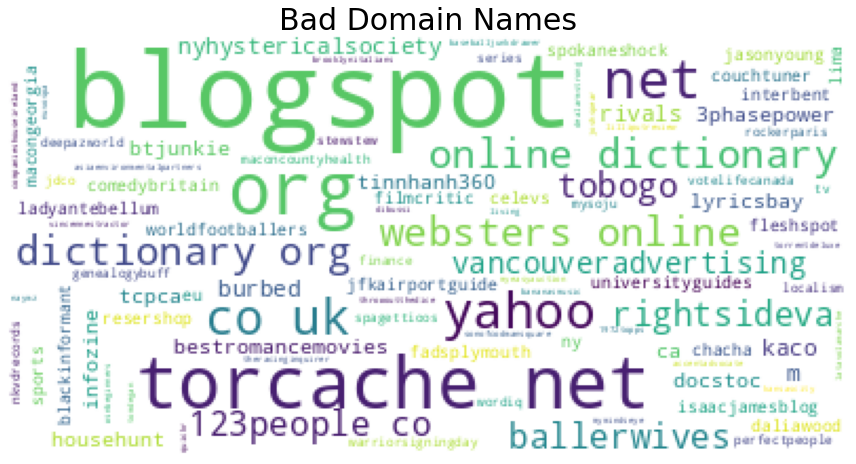

In [9]:
#Plotting the bad domains
txt = str(df_Bad.domain)
plot_wordcloud(txt, max_words=1000, max_font_size=50, 
               title = 'Bad Domain Names', title_size=30)

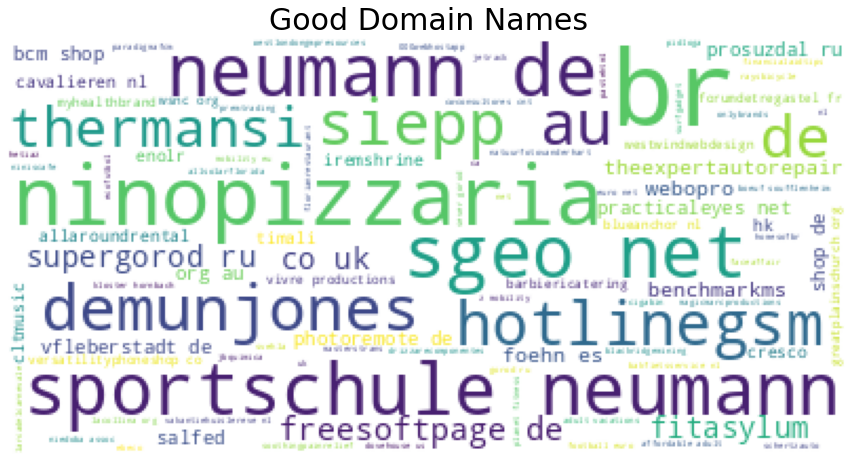

In [10]:
#Plotting the good domains
txt = str(df_Good.domain)
plot_wordcloud(txt, max_words=1000, max_font_size=50, 
               title = 'Good Domain Names', title_size=30)

Text(0, 0.5, 'Number Of Urls')

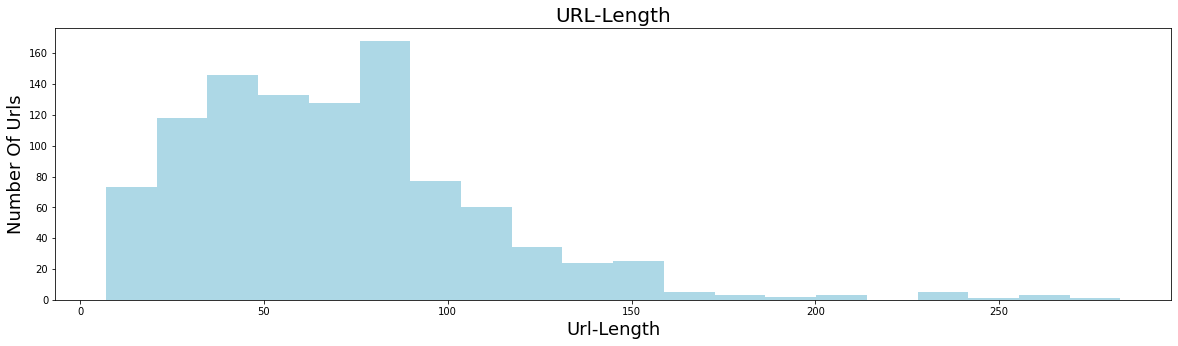

In [11]:
#Plotting the url length
plt.figure(figsize=(20,5))
plt.hist(df['url_len'],bins=20,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
#plt.ylim(0,1000)

Text(0, 0.5, 'Number Of Urls')

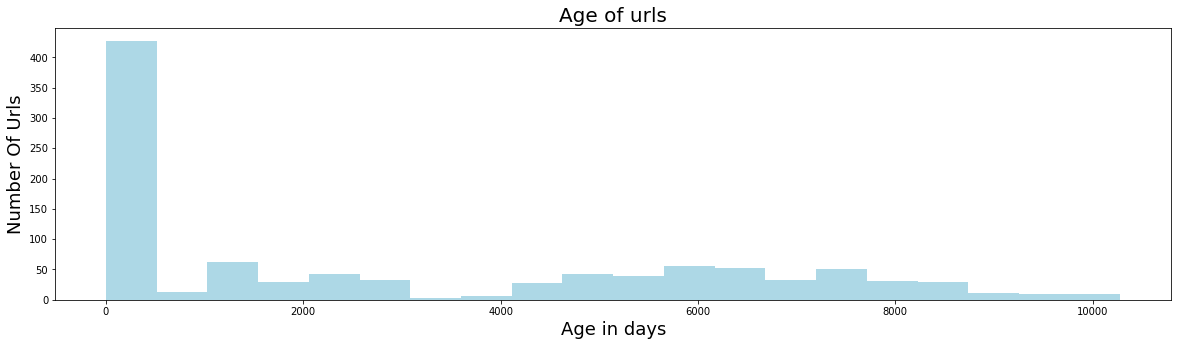

In [12]:
#Plotting the url age in days
plt.figure(figsize=(20,5))
plt.hist(df['age'],bins=20,color='LightBlue')
plt.title("Age of urls",fontsize=20)
plt.xlabel("Age in days",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
#plt.ylim(0,1000)

<Axes: xlabel='status', ylabel='count'>

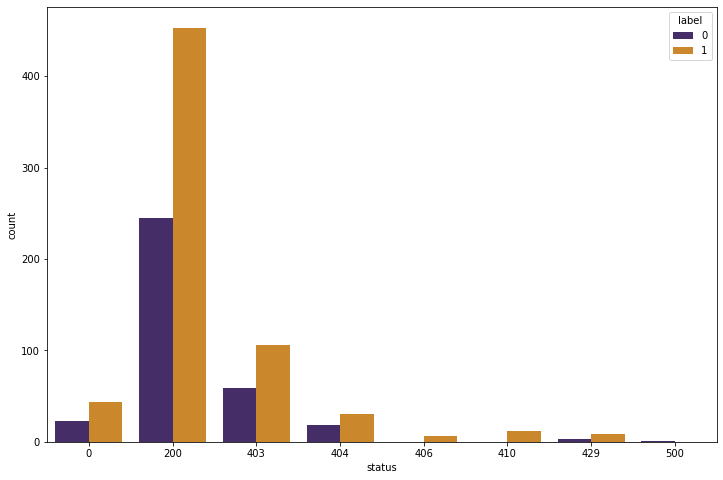

In [13]:
#Plotting graph for website status
plt.figure(figsize=(12,8))
sns.countplot(x='status', hue='label', data=df,palette=['#432371',"#E58B10"])

In [14]:
#Dropping categorical features 
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('url', axis = 1, inplace = True)
df.drop('type', axis = 1, inplace = True)
df.drop('domain', axis = 1, inplace = True)
df.drop('ip_address', axis = 1, inplace = True)
df.drop('city', axis = 1, inplace = True)
df.drop('country', axis = 1, inplace = True)
df.drop('expiration_date', axis = 1, inplace = True)
df.drop('creation_date', axis = 1, inplace = True)

In [15]:
#Dropping features with low variance
df.drop('count_@', axis = 1, inplace = True)
df.drop('count_#', axis = 1, inplace = True)
df.drop('count_+', axis = 1, inplace = True)
df.drop('count_$', axis = 1, inplace = True)
df.drop('count_!', axis = 1, inplace = True)
df.drop('count_*', axis = 1, inplace = True)
df.drop('count_,', axis = 1, inplace = True)
df.drop('https', axis = 1, inplace = True)
df.drop('has_ip_address', axis = 1, inplace = True)
df.drop('num_embed', axis = 1, inplace = True)
df.drop('num_object', axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   label               1009 non-null   int64
 1   url_len             1009 non-null   int64
 2   count_?             1009 non-null   int64
 3   count_-             1009 non-null   int64
 4   count_=             1009 non-null   int64
 5   count_.             1009 non-null   int64
 6   count_%             1009 non-null   int64
 7   count_//            1009 non-null   int64
 8   count_alphas        1009 non-null   int64
 9   count_digits        1009 non-null   int64
 10  count_puncs         1009 non-null   int64
 11  count_www           1009 non-null   int64
 12  abnormal_url        1009 non-null   int64
 13  Shortening_Service  1009 non-null   int64
 14  age                 1009 non-null   int64
 15  intended_life       1009 non-null   int64
 16  life_remaining      1009 non-null   int64


<Axes: >

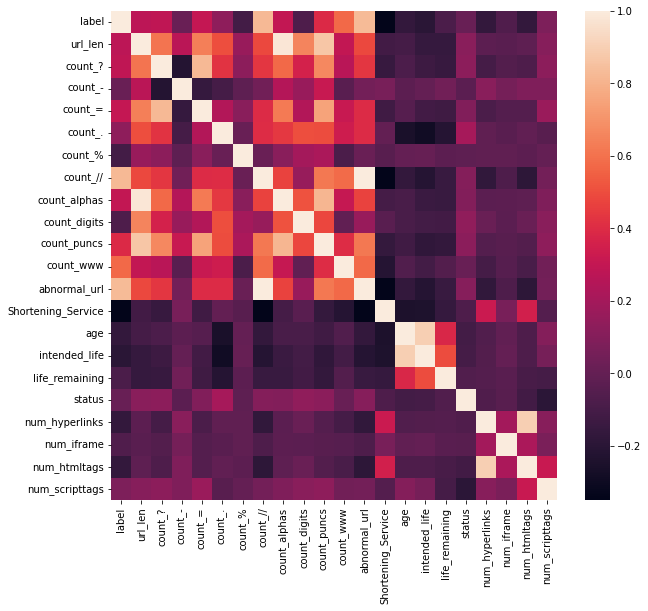

In [17]:
#Plotting a correlation matrix
plt.figure(figsize=(10,9))
sns.heatmap(df.corr())

In [18]:
#Dropping highly correlated features
df.drop('count_alphas', axis = 1, inplace = True)
df.drop('num_htmltags', axis = 1, inplace = True)
df.drop('abnormal_url', axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   label               1009 non-null   int64
 1   url_len             1009 non-null   int64
 2   count_?             1009 non-null   int64
 3   count_-             1009 non-null   int64
 4   count_=             1009 non-null   int64
 5   count_.             1009 non-null   int64
 6   count_%             1009 non-null   int64
 7   count_//            1009 non-null   int64
 8   count_digits        1009 non-null   int64
 9   count_puncs         1009 non-null   int64
 10  count_www           1009 non-null   int64
 11  Shortening_Service  1009 non-null   int64
 12  age                 1009 non-null   int64
 13  intended_life       1009 non-null   int64
 14  life_remaining      1009 non-null   int64
 15  status              1009 non-null   int64
 16  num_hyperlinks      1009 non-null   int64


In [20]:
#Checking count of both the labels
count = df.label.value_counts()
count

1    660
0    349
Name: label, dtype: int64

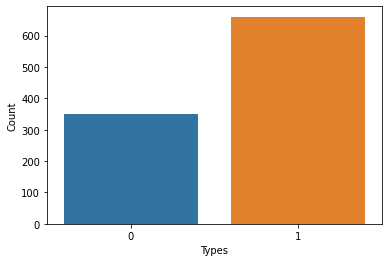

In [21]:
#Checking for class imbalance
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');